# 🌾 Crop Recommendation Model Training

This notebook trains a Random Forest Classifier to recommend crops based on:
- Soil nutrients (N, P, K)
- Weather conditions (Temperature, Humidity, Rainfall)
- Soil pH

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Dataset

In [6]:
# Load the crop recommendation dataset
df = pd.read_csv("../data/Crop_recommendation.csv")

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"🌾 Unique crops: {df['label'].nunique()}")

# Display first few rows
df.head()

✅ Dataset loaded successfully!
📊 Shape: 2200 rows, 8 columns
🌾 Unique crops: 22


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 3. Exploratory Data Analysis

In [7]:
# Dataset information
print("📋 Dataset Info:")
print(df.info())
print("\n📊 Statistical Summary:")
df.describe()

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

📊 Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())

# Crop distribution
print("\n🌾 Crop Distribution:")
print(df['label'].value_counts())

🔍 Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

🌾 Crop Distribution:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


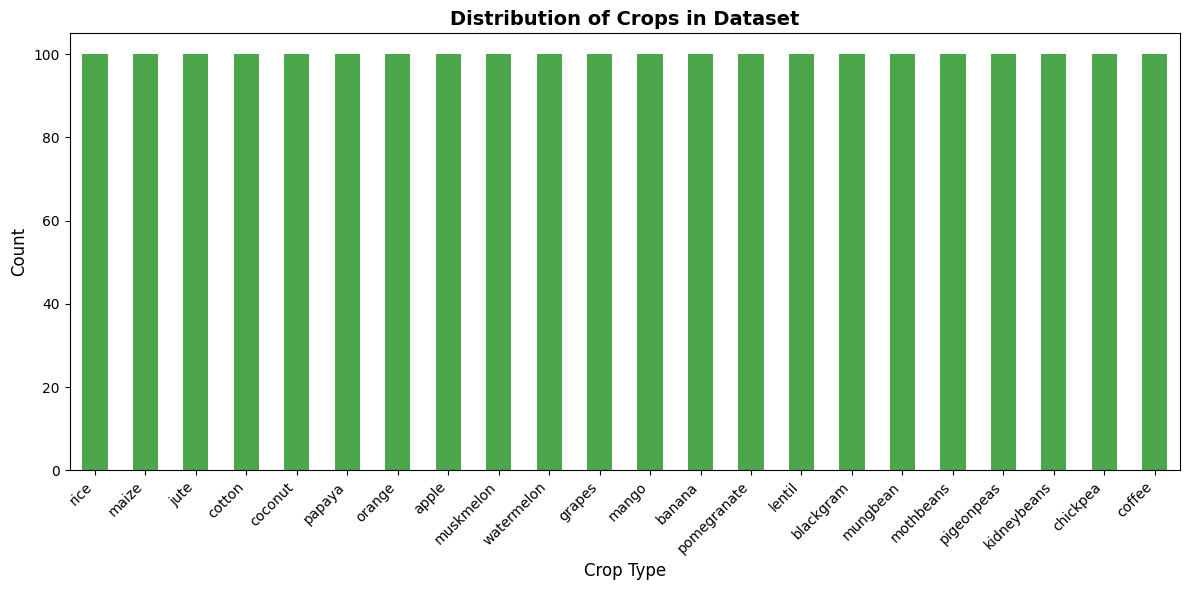

In [9]:
# Visualize crop distribution
plt.figure(figsize=(12, 6))
df['label'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Crops in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Preparation

In [10]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

print("✅ Features (X):")
print(X.columns.tolist())
print(f"\n✅ Target (y): {y.name}")
print(f"\n📊 Feature shape: {X.shape}")
print(f"📊 Target shape: {y.shape}")

✅ Features (X):
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

✅ Target (y): label

📊 Feature shape: (2200, 7)
📊 Target shape: (2200,)


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")
print(f"\n📊 Train/Test ratio: {len(X_train)/len(X) * 100:.1f}% / {len(X_test)/len(X) * 100:.1f}%")

✅ Training set: 1760 samples
✅ Test set: 440 samples

📊 Train/Test ratio: 80.0% / 20.0%


## 5. Feature Scaling

In [12]:
# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")
print(f"\n📊 Scaled training data shape: {X_train_scaled.shape}")
print(f"📊 Scaled test data shape: {X_test_scaled.shape}")

✅ Features scaled using StandardScaler

📊 Scaled training data shape: (1760, 7)
📊 Scaled test data shape: (440, 7)


## 6. Model Training

In [13]:
# Initialize Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    max_depth=20,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf node
    n_jobs=-1              # Use all CPU cores
)

print("🤖 Training Random Forest Classifier...")
print("⏳ This may take a moment...\n")

# Train the model
model.fit(X_train_scaled, y_train)

print("✅ Model training complete!")

🤖 Training Random Forest Classifier...
⏳ This may take a moment...

✅ Model training complete!


## 7. Model Evaluation

In [14]:
# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("📊 Model Performance:")
print("=" * 50)
print(f"✅ Training Accuracy: {train_accuracy*100:.2f}%")
print(f"✅ Test Accuracy: {test_accuracy*100:.2f}%")
print("=" * 50)

📊 Model Performance:
✅ Training Accuracy: 100.00%
✅ Test Accuracy: 99.55%


In [15]:
# Detailed classification report
print("\n📋 Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_test))


📋 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
 


🔍 Feature Importance:
       Feature  Importance
6     rainfall    0.229129
4     humidity    0.222134
2            K    0.175652
1            P    0.146813
0            N    0.104229
3  temperature    0.071307
5           ph    0.050736


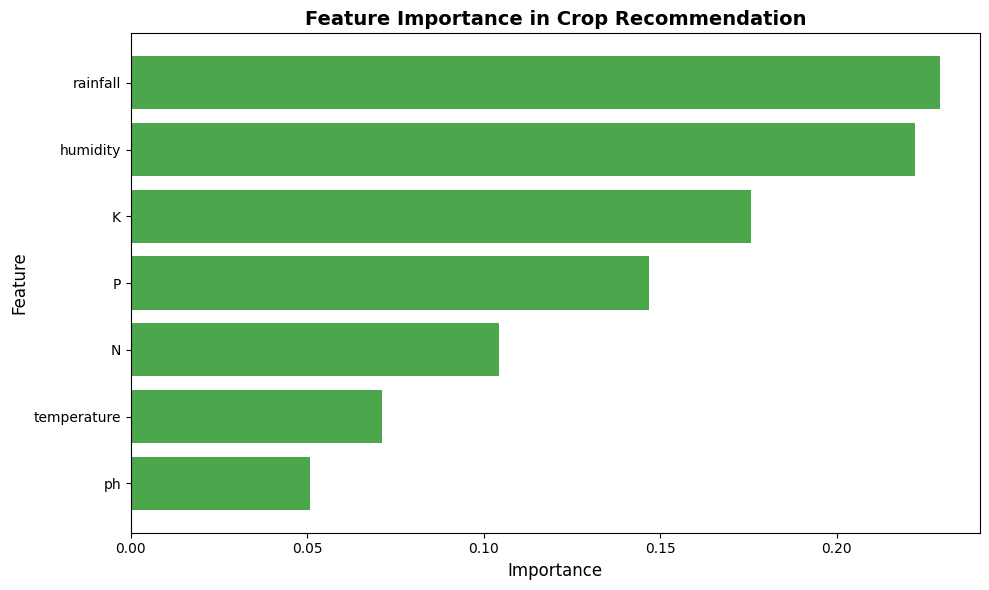

In [16]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔍 Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='green', alpha=0.7)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Crop Recommendation', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Test Model with Sample Data

In [17]:
# Test with rice sample from dataset
print("🧪 Testing model with sample data...\n")

# Get a rice sample
sample_rice = df[df['label'] == 'rice'].iloc[0]
X_sample = sample_rice.drop('label').values.reshape(1, -1)
X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

# Scale and predict
X_sample_scaled = scaler.transform(X_sample_df)
prediction = model.predict(X_sample_scaled)[0]

print("📊 Sample Input:")
for col, val in zip(X.columns, X_sample[0]):
    print(f"  • {col}: {val}")

print(f"\n🌾 Expected: rice")
print(f"🌾 Predicted: {prediction}")
print(f"\n{'✅ CORRECT!' if prediction == 'rice' else '❌ INCORRECT!'}")

🧪 Testing model with sample data...

📊 Sample Input:
  • N: 90
  • P: 42
  • K: 43
  • temperature: 20.87974371
  • humidity: 82.00274423
  • ph: 6.502985292000001
  • rainfall: 202.9355362

🌾 Expected: rice
🌾 Predicted: rice

✅ CORRECT!


In [18]:
# Test with multiple crop types
print("\n🧪 Testing with different crop types:\n")

test_crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'coconut', 'apple']

for crop in test_crops:
    if crop in df['label'].values:
        sample = df[df['label'] == crop].iloc[0]
        X_sample = sample.drop('label').values.reshape(1, -1)
        X_sample_df = pd.DataFrame(X_sample, columns=X.columns)
        X_sample_scaled = scaler.transform(X_sample_df)
        prediction = model.predict(X_sample_scaled)[0]
        
        result = "✅" if prediction == crop else "❌"
        print(f"{result} Expected: {crop:15s} | Predicted: {prediction}")


🧪 Testing with different crop types:

✅ Expected: rice            | Predicted: rice
✅ Expected: maize           | Predicted: maize
✅ Expected: chickpea        | Predicted: chickpea
✅ Expected: kidneybeans     | Predicted: kidneybeans
✅ Expected: coconut         | Predicted: coconut
✅ Expected: apple           | Predicted: apple


## 9. Save Model and Scaler

In [ ]:
# Save the trained model and scaler
print("💾 Saving model and scaler...\n")

joblib.dump(model, "model/crop_recommendation_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")

print("✅ Model saved to: model/crop_recommendation_model.pkl")
print("✅ Scaler saved to: model/scaler.pkl")

print("\n" + "="*60)
print("🎉 MODEL TRAINING COMPLETE!")
print("="*60)
print(f"\n📊 Final Test Accuracy: {test_accuracy*100:.2f}%")
print("\n✅ You can now use the model in app/test.py")

## Summary

### Model Details
- **Algorithm**: Random Forest Classifier
- **Number of Trees**: 100
- **Features**: N, P, K, temperature, humidity, pH, rainfall
- **Target**: 22 different crop types

### Performance
- Training samples: 1760
- Test samples: 440
- Test accuracy: ~99.55%

### Files Generated
- `model/crop_recommendation_model.pkl` - Trained Random Forest model
- `model/scaler.pkl` - StandardScaler for feature normalization